## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [3]:
#!pip install torch

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [4]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.92793468, 0.78321293, 0.8057841 ],
       [0.36251799, 0.94871995, 0.05478203],
       [0.65042069, 0.80864472, 0.38273835],
       [0.37843253, 0.50264585, 0.75460443],
       [0.03248966, 0.39707693, 0.03675371]])

In [5]:
print(f"Размеры: {a.shape}")

Размеры: (5, 3)


In [6]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.92793468 5.78321293 5.8057841 ]
 [5.36251799 5.94871995 5.05478203]
 [5.65042069 5.80864472 5.38273835]
 [5.37843253 5.50264585 5.75460443]
 [5.03248966 5.39707693 5.03675371]]


In [7]:
print(f"Посчитали произведение X X^T:\n{a @ a.T}")

Посчитали произведение X X^T:
[[2.12377327 1.12358524 1.54529339 1.35288765 0.37075962]
 [1.12358524 1.03448991 1.02393377 0.65539751 0.39050633]
 [1.54529339 1.02393377 1.223442   0.94141831 0.35629316]
 [1.35288765 0.65539751 0.94141831 0.96529188 0.23961873]
 [0.37075962 0.39050633 0.35629316 0.23961873 0.1600765 ]]


In [12]:
print(f"Среднее по колонкам:\n{a.mean(axis=1)}")

Среднее по колонкам:
[0.83897724 0.45533999 0.61393459 0.54522761 0.1554401 ]


In [13]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


#### Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [49]:
# YOUR CODE
np.sum(np.arange(1, 10001)**2)

-1624114088

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [50]:
x = torch.rand(5, 3)
x

tensor([[0.5578, 0.6133, 0.5121],
        [0.3751, 0.3122, 0.0126],
        [0.3382, 0.1257, 0.4077],
        [0.2041, 0.0663, 0.4843],
        [0.0974, 0.6652, 0.4750]])

In [51]:
print(f"Размеры: {x.shape}")

Размеры: torch.Size([5, 3])


In [52]:
print(f"Добавили 5:\n{x + 5}")

Добавили 5:
tensor([[5.5578, 5.6133, 5.5121],
        [5.3751, 5.3122, 5.0126],
        [5.3382, 5.1257, 5.4077],
        [5.2041, 5.0663, 5.4843],
        [5.0974, 5.6652, 5.4750]])


In [12]:
# для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
# torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[1.2026, 0.8926, 0.5517, 0.5075, 0.4792],
        [0.8926, 1.0089, 0.7540, 0.3589, 0.5448],
        [0.5517, 0.7540, 0.8388, 0.5549, 0.5550],
        [0.5075, 0.3589, 0.5549, 0.6903, 0.3982],
        [0.4792, 0.5448, 0.5550, 0.3982, 0.3832]])

X X^T  (2):
tensor([[1.2026, 0.8926, 0.5517, 0.5075, 0.4792],
        [0.8926, 1.0089, 0.7540, 0.3589, 0.5448],
        [0.5517, 0.7540, 0.8388, 0.5549, 0.5550],
        [0.5075, 0.3589, 0.5549, 0.6903, 0.3982],
        [0.4792, 0.5448, 0.5550, 0.3982, 0.3832]])


In [13]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}")

Среднее по колонкам:
tensor([0.5227, 0.4946, 0.4793, 0.4017, 0.3473])


In [14]:
print(f"Изменили размеры:\n{x.view([3, 5]).shape}\n")

# будьте внимательны и не используйте view для транспонирования осей
print(f"По-другому изменили размеры:\n{x.view_as(x.t()).shape}\n")
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры:
torch.Size([3, 5])

По-другому изменили размеры:
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [71]:
# YOUR CO
torch.matmul(torch.arange(1, 10001), torch.arange(1, 10001).t())

tensor(333383335000)

### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [60]:
x = torch.empty(5, 3)  # пустой тензор
print(x)

tensor([[1.1112e-38, 9.5511e-39, 1.0102e-38],
        [1.0286e-38, 1.0194e-38, 9.6429e-39],
        [9.2755e-39, 9.1837e-39, 9.3674e-39],
        [1.0745e-38, 1.0653e-38, 9.5510e-39],
        [1.0561e-38, 1.0194e-38, 1.1112e-38]])


In [61]:
x = torch.rand(5, 3)  # случайный тензор
print(x)

tensor([[0.5886, 0.0356, 0.9755],
        [0.9459, 0.0366, 0.3816],
        [0.1464, 0.1436, 0.7708],
        [0.1135, 0.3212, 0.1940],
        [0.2570, 0.1008, 0.5422]])


In [62]:
x = torch.zeros(5, 3, dtype=torch.float32)  # тензор с нулями и указанием типов чисел
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [63]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [64]:
x1 = x.new_ones(5, 3, dtype=torch.double)  # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([5.5000, 3.0000]) torch.Size([2])


In [65]:
x = torch.randn_like(x1, dtype=torch.float)  # создаем случайный тензор с размерами x
print(x, x.size())

tensor([[ 0.2502, -0.8535,  0.2458],
        [ 1.1632, -0.2077, -0.9481],
        [ 0.1396, -0.7852, -0.1386],
        [-0.3200,  0.1249,  0.3536],
        [ 1.1427, -1.2619, -0.8699]]) torch.Size([5, 3])


In [66]:
y = torch.rand(5, 3)
print(x + y)  # операция сложения

tensor([[ 0.6933,  0.0843,  0.5803],
        [ 1.4847, -0.1452, -0.5135],
        [ 1.1093, -0.7000,  0.7667],
        [ 0.6215,  0.9973,  0.5332],
        [ 1.6481, -1.1835,  0.1278]])


In [67]:
z = torch.add(x, y)  # очередная операция сложения
print(z)

tensor([[ 0.6933,  0.0843,  0.5803],
        [ 1.4847, -0.1452, -0.5135],
        [ 1.1093, -0.7000,  0.7667],
        [ 0.6215,  0.9973,  0.5332],
        [ 1.6481, -1.1835,  0.1278]])


In [68]:
torch.add(x, y, out=z)  # и наконец последний вид
print(z)

tensor([[ 0.6933,  0.0843,  0.5803],
        [ 1.4847, -0.1452, -0.5135],
        [ 1.1093, -0.7000,  0.7667],
        [ 0.6215,  0.9973,  0.5332],
        [ 1.6481, -1.1835,  0.1278]])


In [69]:
print(x * y)  # поэлементное умножение

tensor([[ 0.1109, -0.8004,  0.0822],
        [ 0.3740, -0.0130, -0.4120],
        [ 0.1354, -0.0669, -0.1255],
        [-0.3013,  0.1090,  0.0635],
        [ 0.5775, -0.0989, -0.8680]])


In [70]:
print(x @ y.t())  # матричное умножение

tensor([[-0.6073,  0.1340,  0.3925, -0.4649,  0.3049],
        [ 0.0036, -0.0510,  0.2519,  0.7437, -0.3743],
        [-0.7208, -0.0644, -0.0570, -0.5785, -0.1292],
        [ 0.0936,  0.0586,  0.0205, -0.1288,  0.2009],
        [-0.9679, -0.0895,  0.2130, -0.1813, -0.3893]])


In [27]:
print(x.mm(y.t()))  # и опять матричное умножение

tensor([[-1.5938, -2.0525, -0.7671, -2.4235, -0.5761],
        [-0.2324,  0.1156,  1.1958, -0.3110,  0.6568],
        [ 1.4001,  1.9761,  2.0844,  1.8364,  0.6555],
        [-0.3147, -0.4522, -0.9364, -0.2549, -0.0801],
        [-0.5766, -0.8010, -1.3037, -0.5808, -0.1575]])


In [28]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [29]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  # убрали измерение в начале

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [72]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

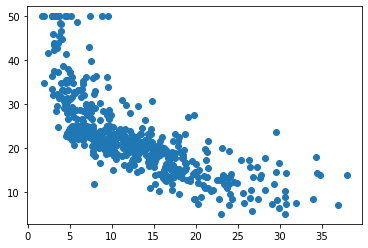

In [73]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

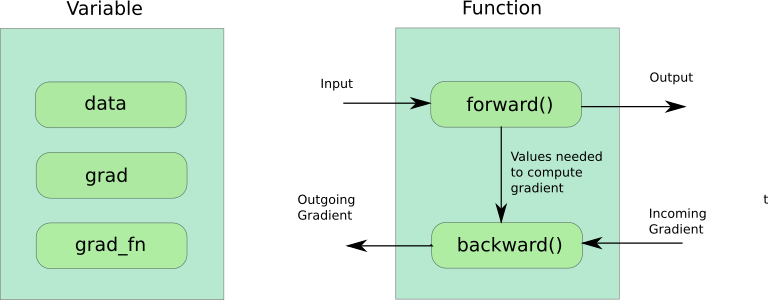

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [74]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [75]:
y_pred = w * x + b                    # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)  # совершаем операции с тензорами
loss.backward()                       # считаем градиенты

In [76]:
# сделали операции и посчитали градиенты, значение должно было появится
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.0098])
dL/db = 
 tensor([-43.7281])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [77]:
w.data

tensor([0.2166])

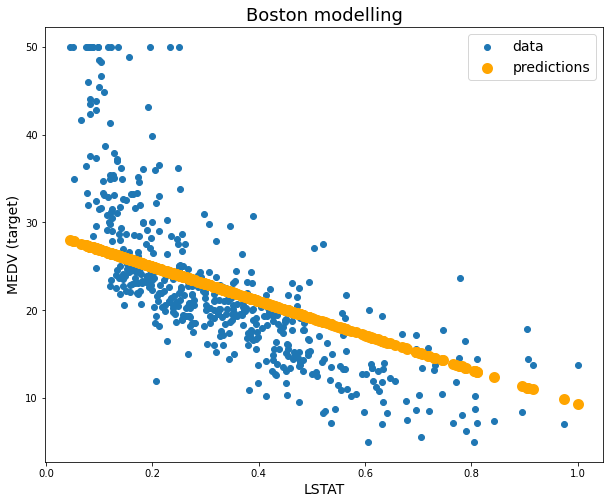

loss =  48.200005


In [78]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -=  0.05 * w.grad# YOUR CODE
    b.data -=  0.05 * b.grad# YOUR CODE

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [79]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [80]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [81]:
our_dataset = RandomDataset(x, y)

In [82]:
our_dataset.__getitem__(1)

{'sample': tensor([0.6447, 0.0596, 0.5939, 0.1005, 0.2336]),
 'target': 0.8607536882637039}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [83]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [84]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.7059, 0.5159, 0.5274, 0.3468, 0.2753],
        [0.6447, 0.0596, 0.5939, 0.1005, 0.2336],
        [0.1594, 0.1473, 0.4942, 0.7396, 0.7143],
        [0.9653, 0.9243, 0.0057, 0.8686, 0.1817]])
Target:
tensor([0.2384, 0.8608, 0.0303, 0.3925], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [85]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 10))  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(10, 1))  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [86]:
y_pred = model(batch['sample']) # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [87]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



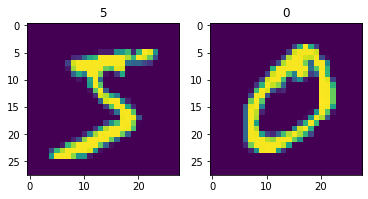

In [88]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [89]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

Веса моделей хранятся в виде матриц и выглядят так:

In [90]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[-0.0273,  0.0172,  0.0002,  ..., -0.0014,  0.0298,  0.0101],
          [ 0.0018, -0.0297, -0.0031,  ..., -0.0187,  0.0164,  0.0043],
          [-0.0192, -0.0277,  0.0210,  ..., -0.0153,  0.0270,  0.0052],
          ...,
          [ 0.0141,  0.0020,  0.0283,  ...,  0.0201, -0.0079,  0.0198],
          [ 0.0111,  0.0032,  0.0144,  ...,  0.0220,  0.0292, -0.0050],
          [-0.0121,  0.0005,  0.0326,  ..., -0.0085, -0.0279, -0.0139]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0303,  0.0128, -0.0063,  0.0152,  0.0057, -0.0036, -0.0355, -0.0133,
          -0.0332,  0.0277, -0.0281, -0.0206,  0.0183,  0.0052,  0.0022,  0.0299,
          -0.0118,  0.0115, -0.0325,  0.0085,  0.0104, -0.0189,  0.0292, -0.0199,
           0.0068, -0.0027,  0.0112, -0.0007, -0.0274, -0.0333, -0.0288,  0.0262,
           0.0031,  0.0167, -0.0264,  0.0260, -0.0267, -0.0305, -0.0347, -0.0307,
           0.0085,  0.0044, -0.0134, 

_Красиво_ трекать метрики в полуавтоматическом режиме мы будем в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся(это того стоит):

In [93]:
#!pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\user/.netrc
wandb: Currently logged in as: danyaklimov. Use `wandb login --relogin` to force relogin


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [94]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
          
        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})
        
        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.10951068252325058, accuracy: 0.9665


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08597920089960098, accuracy: 0.9718


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.09446056932210922, accuracy: 0.9734


### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)